In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
# K-Means
from sklearn.cluster import KMeans
# PCA
from sklearn.decomposition import PCA
# Hierarchical Clustering
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

In [66]:
dataset = pd.read_csv('diabetes-dataset.csv')

In [67]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [68]:
y = data['Outcome']
dataset = data.drop(['Outcome'], axis=1)

In [69]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [70]:
# PCA Tranformation
pca = PCA(2)
 
#Transform the data
dataset = pca.fit_transform(dataset)

In [114]:
dataset.shape

(2000, 2)

In [115]:
dataset = pd.DataFrame(dataset)
dataset.head()

,0,1
0,-77.284731,-24.334762
1,41.800926,40.660552
2,-79.573567,-23.598817
3,171.475001,4.848982
4,400.009652,23.977559


# K-Means Clustering with 6,8 and 10 Clusters

## K-Means Clustering with 6 Clusters

In [116]:
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dataset)
   
np.unique(label)

#Getting the Centroids
centroids = kmeans.cluster_centers_

In [117]:
centroids

array([[  2.05458684,  16.3692466 ],
       [219.06556928,  -9.31524908],
       [-79.7535419 ,  15.82112759],
       [436.18800255,   3.98829464],
       [ 89.90208407,  -5.10992957],
       [-76.71374671, -40.13993486]])

### Scatter Plots of Dataset

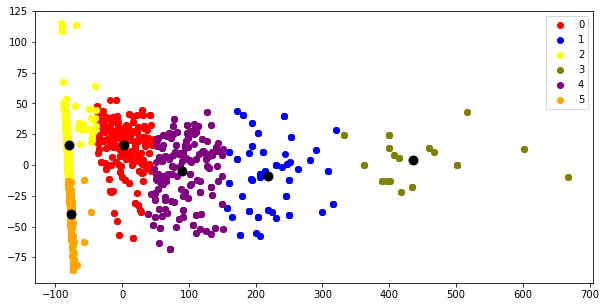

In [118]:
c = ['red','blue','yellow','olive','purple','orange','green','pink','magenta','cyan']

#filter rows of original data
plt.figure(figsize=(10,5))
for i in range(6):
    data = dataset[label == i]

    #plt.subplot(6,7,count+1)
    plt.scatter(data.iloc[:,0],data.iloc[:,1],color=c[i],label=i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()

## K-Means Clustering with 8 Clusters

In [119]:
kmeans = KMeans(n_clusters= 8)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dataset)
   
np.unique(label)

#Getting the Centroids
centroids = kmeans.cluster_centers_

In [120]:
centroids

array([[116.04296278,  -1.06206509],
       [-74.19217226, -51.88879568],
       [436.18800255,   3.98829464],
       [-10.73229398,  22.57248993],
       [228.58509943,  -9.97514932],
       [-80.70158574,  -4.05930602],
       [ 50.28650468,  -5.22053258],
       [-81.56323398,  33.28005938]])

### Scatter Plots of Dataset

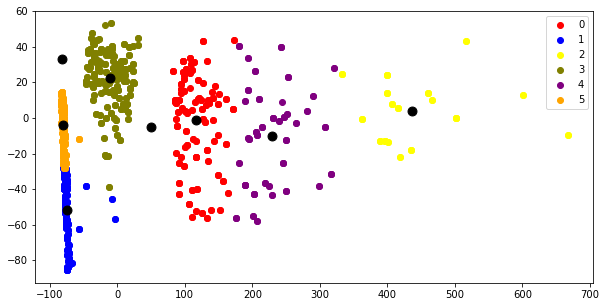

In [121]:
c = ['red','blue','yellow','olive','purple','orange','green','pink','magenta','cyan']

#filter rows of original data
plt.figure(figsize=(10,5))
for i in range(6):
    data = dataset[label == i]

    #plt.subplot(6,7,count+1)
    plt.scatter(data.iloc[:,0],data.iloc[:,1],color=c[i],label=i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()

## K-Means Clustering with 10 Clusters

In [123]:
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dataset)
   
np.unique(label)

#Getting the Centroids
centroids = kmeans.cluster_centers_

In [124]:
centroids

array([[-80.4497399 ,  -6.55781799],
       [209.03511909, -10.78646858],
       [ 25.99362254,  14.32614637],
       [371.92741726,  -1.56907657],
       [ 63.56862068, -26.64871619],
       [-22.04825953,  25.47993475],
       [109.71997451,   6.92836882],
       [-73.11738466, -54.60187708],
       [526.12476909,  10.32419716],
       [-82.88629006,  30.77925026]])

### Scatter Plots of Dataset

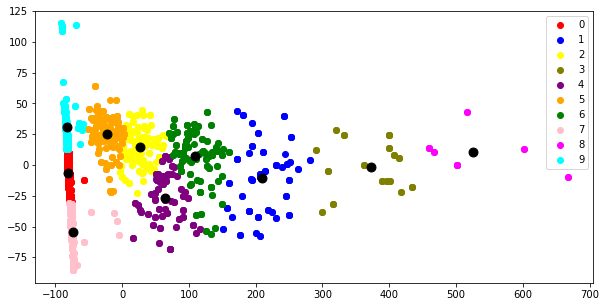

In [125]:
#filter rows of original data
plt.figure(figsize=(10,5))
for i in range(10):
    data = dataset[label == i]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],color=c[i],label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()

# Hierarchical Clustering 

In [73]:
dataset.head()

,0,1
0,-77.284731,-24.334762
1,41.800926,40.660552
2,-79.573567,-23.598817
3,171.475001,4.848982
4,400.009652,23.977559


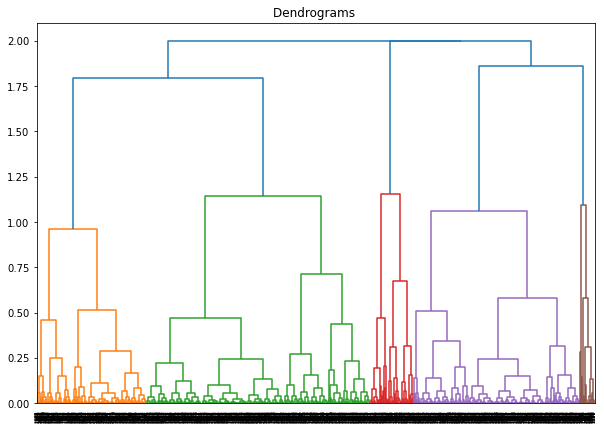

In [64]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms ")  
dend = hc.dendrogram(hc.linkage(dataset, method='complete'))

### Actual Clustering

### 10 Clusters with single linkage

In [97]:
clustering =  AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='single')

In [98]:
model = clustering.fit_predict(dataset)

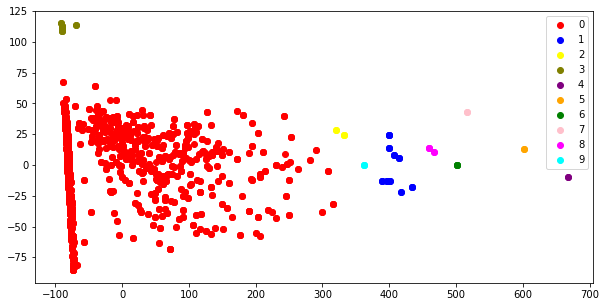

In [101]:
c = ['red','blue','yellow','olive','purple','orange','green','pink','magenta','cyan']
    
#filter rows of original data
plt.figure(figsize=(10,5))
for i in range(10):
    data = dataset[model == i]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],color=c[i],label=i)

plt.legend()
plt.show()

### 10 Clusters with average linkage

In [108]:
clustering =  AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='average')

In [109]:
model = clustering.fit_predict(dataset)

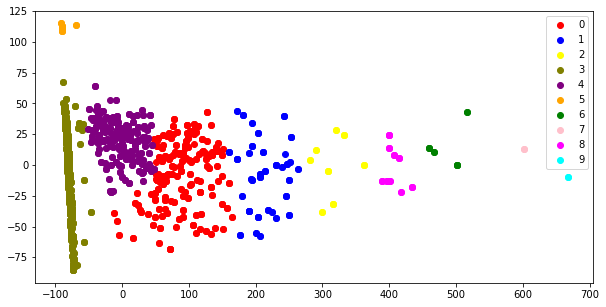

In [110]:
c = ['red','blue','yellow','olive','purple','orange','green','pink','magenta','cyan']
    
#filter rows of original data
plt.figure(figsize=(10,5))
for i in range(10):
    data = dataset[model == i]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],color=c[i],label=i)

plt.legend()
plt.show()

### 10 Clusters with complete linkage

In [111]:
clustering =  AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='average')

In [112]:
model = clustering.fit_predict(dataset)

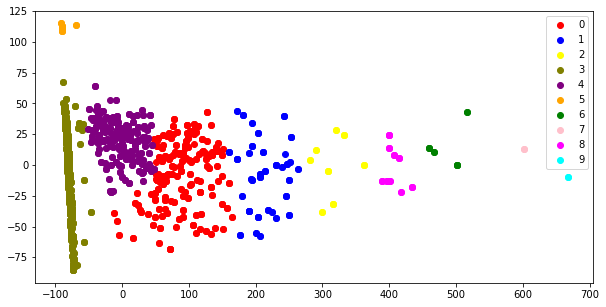

In [113]:
c = ['red','blue','yellow','olive','purple','orange','green','pink','magenta','cyan']
    
#filter rows of original data
plt.figure(figsize=(10,5))
for i in range(10):
    data = dataset[model == i]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],color=c[i],label=i)

plt.legend()
plt.show()